# Introduction to Regression with Neural Networks in TensorFlow

There are many difinitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Create data to view and fit

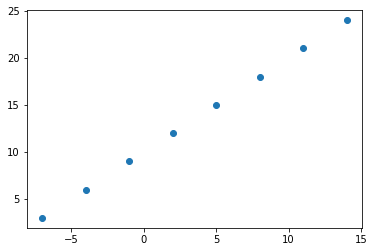

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(x, y)

In [ ]:
y== x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our hosing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
x[0], y[0] # looking at the values that how much will be the predicting value of y based on x

(-7.0, 3.0)

In [ ]:
x[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = x[0].shape # It might be scalar as well
output_shape = y[0].shape # It might be scalar as well
input_shape, output_shape

((), ())

In [ ]:
# Looking at the shapes of the input and output
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
x[0], y[0]

(-7.0, 3.0)

In [ ]:
x[0].ndim # Here it became a scalar as it doesn't have any dimension

0

In [ ]:
!nvidia-smi

Sun Feb 27 13:34:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    71W / 149W |    147MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.constant(tf.cast(x, dtype = tf.float32))
Y = tf.constant(tf.cast(y, dtype = tf.float32))
X.shape,Y.shape
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

## Steps in modelling with TensorFlow
1. **Creating a model** -define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to fund patterns between X & Y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create  model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD()) # sgd is short for stochasti gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(x, axis =-1), y, epochs = 5) # Fitting model with 5 times training repetition(epochs = 5) # Tf.expand_dims() is used to expand the dimension at the last index

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748


In [ ]:
# Predicting the value of 17.0 that what will be the output of the input by our trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11.5

array([[24.21602]], dtype=float32)

### Improving a model

We can improve our model, by altering the steps we tookto create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units(also called neurons)withnin each of the hidden layers, change the activation function of each later.
2. **Complling a model** - here we might change the optization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(x, axis =-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 304ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================]

In [ ]:
model.predict([11.0])

array([[19.53461]], dtype=float32)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(x, axis =-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 721ms/step - loss: 13.7577 - mae: 13.7577
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5294 - mae: 13.5294
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3009 - mae: 13.3009
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0720 - mae: 13.0720
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8423 - mae: 12.8423
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6119 - mae: 12.6119
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3806 - mae: 12.3806
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1483 - mae: 12.1483
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9150 - mae: 11.9150
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6806 - mae: 11.6806
Epoch 11/100
1/1 [==============================] 

In [ ]:
model.predict([17.0])

array([[30.728184]], dtype=float32)

In [ ]:
model.predict([11.0])

array([[20.824797]], dtype=float32)

In [ ]:
# Let's see if we do another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(# loss = tf.keras.losses.mae,
              loss = "mae",
              optimizer = tf.keras.optimizers.Adam(lr = 0.01), # lr = learning right
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 418ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8820 - mae: 6.8820
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 

In [ ]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

array([[27.325062]], dtype=float32)

In [ ]:
model.predict([11.0])

array([[21.239328]], dtype=float32)

In [ ]:
model.predict([[19.0]])

array([[29.35364]], dtype=float32)

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
# Make a bigger dataset
a = tf.range(-100, 100, 4) # Array in the rang of -100 to 100 with the differnece of 4 in each digit
a

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make lablels for the dataset
b = a+ 10
b

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

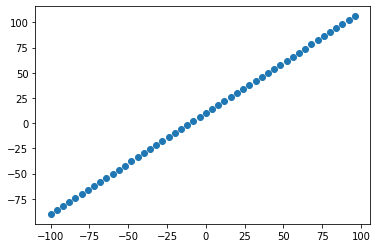

In [ ]:
# Viusalize the data
import matplotlib.pyplot as plt
plt.scatter(a,b)

### The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data avaiable.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.


In [ ]:
# Check the length of how many samples we have
len(a)

50

In [ ]:
# Split the data into train and test sets
a_train = a[:40] # first 40 are training samples (80% of the data)
b_train = b[:40]
a_test = a[40:] # last 10 are testing samples (20% of the data)
b_test = b[40:]


len(a_train), len(a_test), len(b_train), len(b_test)

(40, 10, 40, 10)

### Visualizing the data

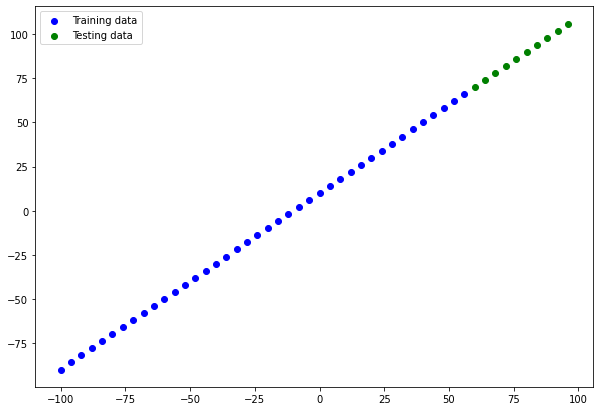

In [ ]:
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(a_train, b_train, c= "b", label ="Training data")
# Plot test data in green
plt.scatter(a_test, b_test, c = "g", label = "Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's build the model

# 1. Create the model
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              #optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ["mae"]
)

# 3. Fit the model
#model.fit(tf.expand_dims(a_train, axis = -1), b_train, epochs = 100) # We are fitting only training data

In [ ]:
#model.summary()

In [ ]:
a[0], b[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's Create a model which builds automatically by defining the input_shape arguments in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, input_shape =[1], name = "input_layer"),
                            
                             tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
model.fit(tf.expand_dims(a_train, axis = -1), b_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 33.6169 - mae: 33.6169
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2908 - mae: 14.2908
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1354 - mae: 11.1354
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.5094 - mae: 13.5094
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.7149 - mae: 12.7149
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9581 - mae: 9.9581
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 7.0397 - mae: 7.0397
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6283 - mae: 9.6283
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 7.8612 - mae: 7.8612
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 7.4164 - mae: 7.4164
Epoch 11/100
2/2 [==============================] - 0s 13ms/step - 

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


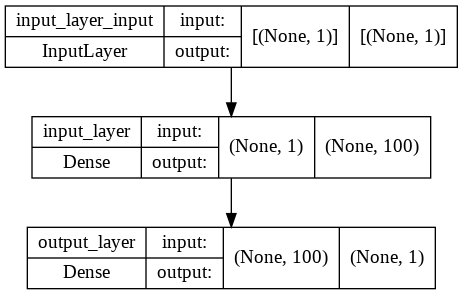

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

### Visualizing our model's predictions

In [ ]:
# Make some predictions
y_pred = model.predict(a_test)
y_pred

array([[ 70.97151 ],
       [ 75.029366],
       [ 79.08722 ],
       [ 83.1451  ],
       [ 87.20295 ],
       [ 91.26082 ],
       [ 95.31867 ],
       [ 99.37653 ],
       [103.4344  ],
       [107.49226 ]], dtype=float32)

In [ ]:
b_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = a_train,
                     train_labels = b_train,
                     test_data = a_test,
                     test_labels = b_test,
                     predictions = y_pred):
  '''
  Plot Training data, test data and copare predictions to ground truth labels
  '''
  plt.figure(figsize = (10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot the predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # show the legend
  plt.legend()

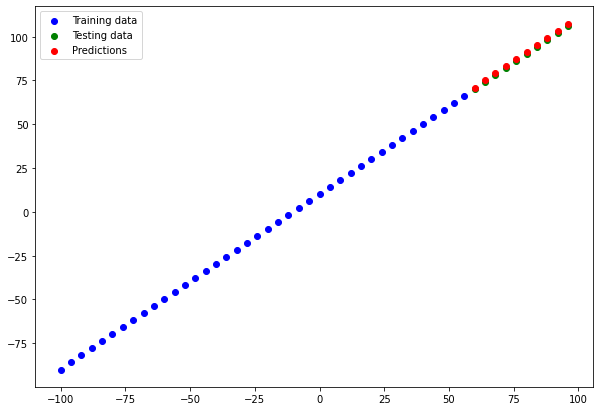

In [ ]:
plot_predictions(train_data = a_train,
                 train_labels = b_train,
                 test_data = a_test,
                 test_labels = b_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluating metrics

In [ ]:
# Evaluate the model
model.evaluate(a_test, b_test)

1/1 [==============================] - 0s 157ms/step - loss: 1.2319 - mae: 1.2319


[1.2318840026855469, 1.2318840026855469]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true =b_test, y_pred= y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.22279 , 14.182381, 11.965113, 10.570979, 10.      , 10.252164,
       11.327469, 13.22592 , 15.947522, 19.492264], dtype=float32)>

In [ ]:
# Turning y_pred into tensors
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.97151 ],
       [ 75.029366],
       [ 79.08722 ],
       [ 83.1451  ],
       [ 87.20295 ],
       [ 91.26082 ],
       [ 95.31867 ],
       [ 99.37653 ],
       [103.4344  ],
       [107.49226 ]], dtype=float32)>

In [ ]:
# Visualizing the shape of the test set
b_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Removing the 1 extra dimension in the y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.97151 ,  75.029366,  79.08722 ,  83.1451  ,  87.20295 ,
        91.26082 ,  95.31867 ,  99.37653 , 103.4344  , 107.49226 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = b_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.231884>

In [ ]:
model.evaluate(a_test, b_test)

1/1 [==============================] - 0s 27ms/step - loss: 1.2319 - mae: 1.2319


[1.2318840026855469, 1.2318840026855469]

In [ ]:
mse = tf.metrics.mean_squared_error(b_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.5451591>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=b_test, y_pred = tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = b_test, y_pred = tf.squeeze(y_pred))

In [ ]:
# Set the random seed
tf.random.set_seed(42)
# Build the model
# 1. Create the model
model_1 = tf.keras.Sequential([
 tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics = ["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(a_train, axis =-1), b_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

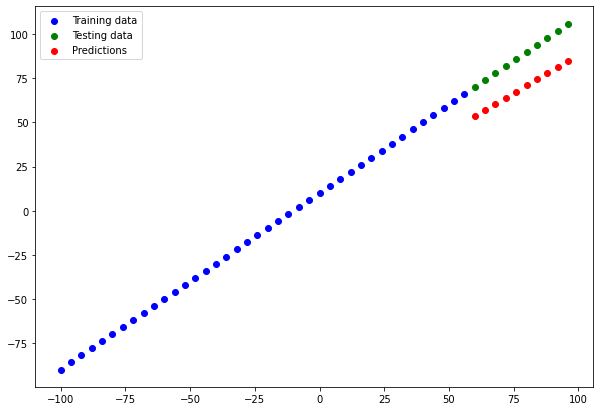

In [ ]:
y_preds_1 = model_1.predict(a_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
mae_1 = mae(b_test, y_preds_1)
mse_1 = mse(b_test, y_preds_1)
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

### Build model_2
* 2 dense layers(connected layers), trained for 100 epochs

In [ ]:
# Build the model

# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2. compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ["mse"])

# 3. fit the model
model_2.fit(tf.expand_dims(a_train, axis = -1), b_train, epochs = 100, verbose = 0)

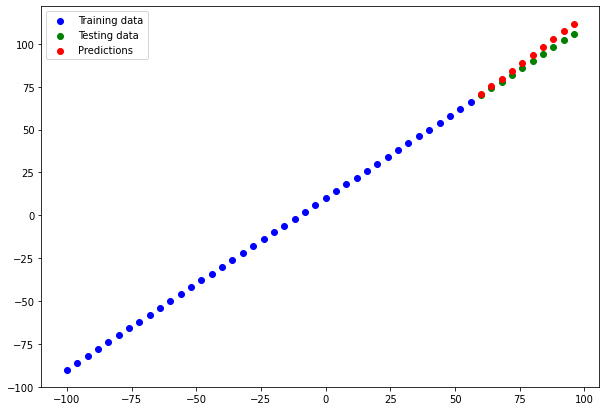

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(a_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(b_test, y_preds_2)
mse_2 = mse(b_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.0703>)

### **Build 'model_3'**
* 2 layers, trained for 500 epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Comile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(a_train, axis = -1), b_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 7ms/

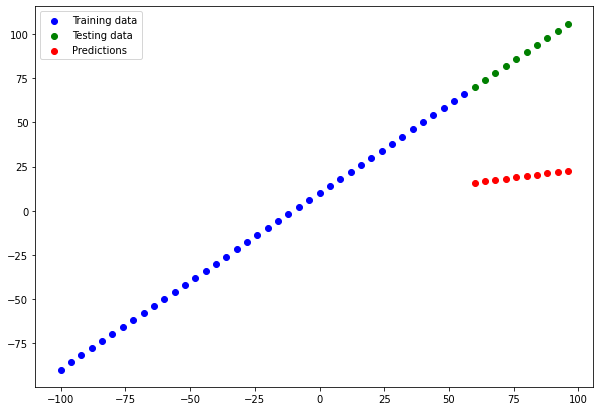

In [ ]:
y_pred_3 = model_3.predict(a_test)
plot_predictions(predictions = y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(b_test, y_pred_3)
mse_3 = mse(b_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

### Comparing the results of our expreiments

In [ ]:
import pandas as pd
# Let;s compare our model's results using a pandas DataFrame
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196964,13.070300
2,model_3,68.713623,4808.028320


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Let's save our model_2

In [ ]:
# Saving the model using saved_model format
model_2.save("Best Model")

INFO:tensorflow:Assets written to: Best Model/assets


In [ ]:
model_2_savedmodel = tf.keras.models.load_model("/content/Best Model")

In [ ]:
model_2_savedmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Creating a larger regression model

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# we cannot pass the object datatype to the model
# We have to turn these into the numerical encoding
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Turning object datatype data into numerical encoding using one_hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Creating x values(features)
x = insurance_one_hot.drop("charges", axis = 1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# Creating y values(labels)
y = insurance["charges"]

# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creating the training and test sets
# spiting up data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [ ]:
# Let's builda neural network

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics =["mae"]
)

# 3. Fit the model
insurance_model.fit(x_train, y_train, epochs = 100 )

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1738 - mae: 7493.1738

In [ ]:
# check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3281 - mae: 7023.3281


[7023.328125, 7023.328125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

In [ ]:
# Create another model by adding an extra layer with more hidden units

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(x_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 4ms/step - loss: 11434.4619 - mae: 11434.4619
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7504.8208 - mae: 7504.8208
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7289.5034 - mae: 7289.5034
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7064.4629 - mae: 7064.4629
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6825.5928 - mae: 6825.5928
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6569.6016 - mae: 6569.6016
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 6254.7827 - mae: 6254.7827
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 6121.6006 - mae: 6121.6006
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 5940.2461 - mae: 5940.2461
Epoch 11/

In [ ]:
insurance_model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1200      
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3159.0828 - mae: 3159.0828


[3159.082763671875, 3159.082763671875]

In [ ]:
# Now creating model with more epochs 
 
# Set Random Seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_3.fit(x_train, y_train, epochs = 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 3ms/step - loss: 11434.4619 - mae: 11434.4619
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 7504.8208 - mae: 7504.8208
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7289.5034 - mae: 7289.5034
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7064.4629 - mae: 7064.4629
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 6825.5928 - mae: 6825.5928
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6569.6016 - mae: 6569.6016
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 6442.8633 - mae: 6442.8633
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 6254.7827 - mae: 6254.7827
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 6121.6006 - mae: 6121.6006
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 5940.2461 - mae: 5940.2461
Epoch 11/

In [ ]:
insurance_model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3204.1843 - mae: 3204.1843


[3204.184326171875, 3204.184326171875]

Text(0.5, 0, 'epochs')

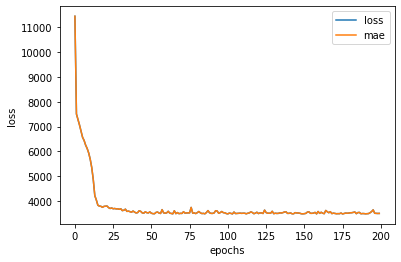

In [ ]:
from matplotlib import pyplot, pylab
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
pylab.ylabel('loss')
pylab.xlabel('epochs')

### Normalization

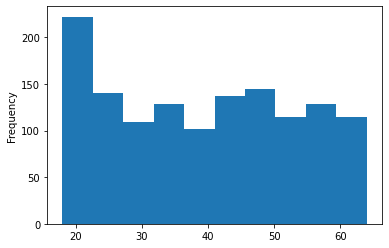

In [ ]:
x["age"].plot(kind = "hist")

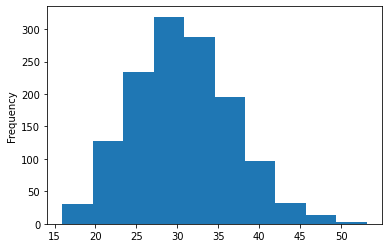

In [ ]:
x["bmi"].plot(kind = "hist")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
  (MinMaxScaler(),["age", "bmi", "children"]), # turn all values in these columns
  (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create x & y
x = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
# What does our data look like now?
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
              optimizer = tf.optimizers.Adam(),
              metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(x_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [ ]:
insurance_model_4.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
insurance_model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               1200      
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
